# Prediction Using Supervised ML

In [1]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

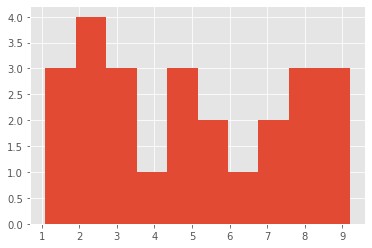

In [3]:
#Graphical Representation
# Histogram
plt.hist(s_data.Hours)

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

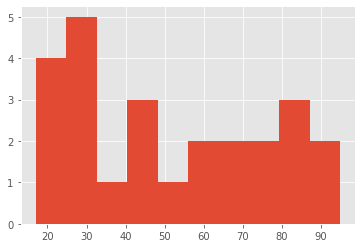

In [4]:
plt.hist(s_data.Scores)

{'whiskers': [<matplotlib.lines.Line2D at 0x2253d7eaf08>,
 'caps': [<matplotlib.lines.Line2D at 0x2253d7efc08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2253d7e5e88>],
 'medians': [<matplotlib.lines.Line2D at 0x2253d7f5948>],
 'fliers': [<matplotlib.lines.Line2D at 0x2253d7f5f88>],
 'means': []}

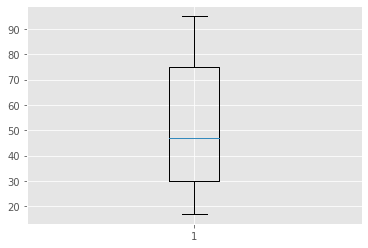

In [5]:
plt.boxplot(s_data.Scores) #boxplot



{'whiskers': [<matplotlib.lines.Line2D at 0x2253d85ce48>,
 'caps': [<matplotlib.lines.Line2D at 0x2253d860e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2253d85c408>],
 'medians': [<matplotlib.lines.Line2D at 0x2253d865f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2253d865fc8>],
 'means': []}

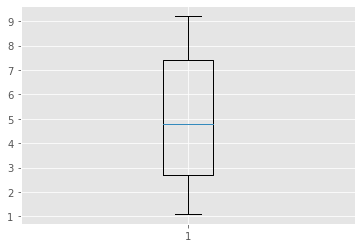

In [6]:
plt.boxplot(s_data.Hours) #boxplot


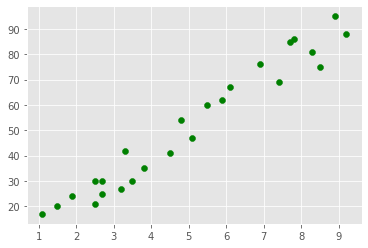

In [8]:
# Scatter plot
plt.scatter(x = s_data['Hours'], y = s_data['Scores'], color = 'green') 

# We can see a positive relationship between the no.of hours studied and percentge of score

In [9]:
# correlation
np.corrcoef(s_data.Hours, s_data.Scores) 

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

# Finding the Best Model

In [10]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


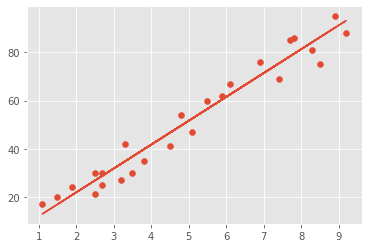

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# Model Evaluation on Test data
# You can also test with your own data
#hours = 9.25
own_pred = regressor.predict([[9.25]])
own_pred

array([93.69173249])

In [21]:
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


# Model has accuracy 96% and Train sse and test see are small and close to each other, which indicates Right Fit Model